In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [8, 4]  # Bigger images
plt.rcParams['font.size']= 14

pd.set_option('display.max_columns', None)

p = 'data/part206/part206_pilot_ecg_signals.p'
ecg = pickle.load(open(p,"rb"))
eda = pickle.load(open('data/part206/part206_pilot_eda_signals.p',"rb"))
rsp = pickle.load(open('data/part206/part206_pilot_rsp_signals.p',"rb"))
baseline_fn = 'data/part206/part206_baseline_ecg_signals.p'
baseline2_fn = 'data/part206/part206_baseline_eda_signals.p'
baseline3_fn = 'data/part206/part206_baseline_rsp_signals.p'
ecg_baseline = pickle.load(open(baseline_fn,"rb"))
eda_baseline = pickle.load(open(baseline2_fn,"rb"))
rsp_baseline = pickle.load(open(baseline3_fn,"rb"))

In [3]:
data_file = 'data/part206/part206_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})
start_times = [317250, 1023250, 1567250, 2101250, 2659250, 3307250, 3843250, 4377250, 4913250, 5451250, 5939250, 6503250]
feedback_times = [950589, 1495874, 2029686, 2580921, 3103039, 3767436, 4295163, 4844705, 5378331, 5858753, 6393158, 6956801]
taskload_settings = [3.0, 3.0, 2.0 ,3.0 ,2.0, 4.0 ,2.0 ,4.0,4.0,2.0,4.0,3.0]
trust_settings = [1,1,1,1,0,1,0,1,1,1,1,0]
elapsed_time_lockin=[6.30000000000000, 5.06666666666666, 7.93333333333333, 5, 8.63333333333333, 6.40000000000000, 9.10000000000000, 6.33333333333334, 6.80000000000000,5.66666666666666,5.26666666666667,7.36666666666667]

durations = [100,100,100,100,100,100,100,100,100,100,100,100]
#durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

In [4]:
events = {}
events['onset'] = start_times
events['duration'] = durations
events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events['condition'] =  taskload_settings
#events['trust'] = trust_settings DOES NOT WORK!

events_feedback = {}
events_feedback['onset'] = feedback_times
events_feedback['duration'] = durations
events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events_feedback['condition'] =  taskload_settings

In [5]:
ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)

ecg_trust_interval = nk.epochs_create(ecg,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
eda_trust_interval = nk.epochs_create(eda,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
rsp_trust_interval = nk.epochs_create(rsp,events,sampling_rate=rate,epochs_start=50,epochs_end=70)

ecg_trust_event = nk.epochs_create(ecg,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)
eda_trust_event = nk.epochs_create(eda,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)
rsp_trust_event = nk.epochs_create(rsp,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)


In [6]:
pi_high_tl = {}
hc=1
pi_med_tl = {}
mc=1
pi_low_tl = {}
lc=1
for i in range(1,13):
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = ecg_pilot_interval[i]
        hc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = ecg_pilot_interval[i]
        mc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = ecg_pilot_interval[i]
        lc+=1

for i in range(1,13):
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = eda_pilot_interval[i]
        hc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = eda_pilot_interval[i]
        mc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = eda_pilot_interval[i]
        lc+=1
            
for i in range(1,13):
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = rsp_pilot_interval[i]
        hc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = rsp_pilot_interval[i]
        mc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = rsp_pilot_interval[i]
        lc+=1

In [7]:
#peaks, info = nk.ecg_peaks(ecg, sampling_rate=rate)
#hrv_freq = nk.hrv_frequency(peaks, sampling_rate=2000, show=True)
#plot = nk.events_plot(events, eda['EDA_Clean'])

In [8]:
display(nk.eda_analyze(eda_pilot_interval, sampling_rate=rate))
display(nk.eda_analyze(eda_baseline,sampling_rate=rate))

C:\Users\BIOPACMan\Anaconda3\lib\site-packages\neurokit2\eda\eda_intervalrelated.py:116: RuntimeWarning: invalid value encountered in double_scalars
  output["SCR_Peaks_Amplitude_Mean"] = np.nansum(amplitude) / np.sum(peaks)


,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean
1,0.0,NaN
2,0.0,NaN
3,2.0,2.540143
4,3.0,0.734894
5,1.0,0.951874
6,1.0,3.775457
7,1.0,0.006630
8,0.0,NaN
9,1.0,0.000421
10,1.0,0.900512


,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean
0,26.0,0.008195


In [9]:
display(nk.ecg_analyze(ecg_pilot_interval, sampling_rate=rate))
display(nk.ecg_analyze(ecg_trust_interval, sampling_rate=rate))
display(nk.ecg_analyze(ecg_baseline, sampling_rate=rate))

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
1,99.020326,42.597572,608.000000,78.288728,42.800700,0.128764,0.070062,584.00,55.59750,0.095201,90.000,14.814815,46.913580,377.0,3.857143,NaN,NaN,NaN,0.019599,0.000597,NaN,NaN,0.970431,-3.932251,30.264666,106.121124,0.285190,10089.917003,3.506436,4.710858,1488.427883,0.395062,0.405063,0.625000,0.187500,54.138310,54.407590,53.880039,58.227848,0.719626,0.280374,25.713120,16.049814,0.373333,0.626667,64.841026,84.007943,0.399453,0.600547,49.323033,60.476983,0.580947,1.018570
2,103.357968,13.606284,580.482353,29.055719,13.687957,0.050054,0.023440,575.50,25.20420,0.043795,33.000,1.176471,8.235294,129.5,4.250000,NaN,NaN,NaN,0.023259,0.000417,NaN,NaN,0.982407,-3.761052,9.678847,40.186837,0.240846,1221.960921,4.152027,3.794027,667.427379,0.352941,0.365854,0.333333,0.000000,50.178571,50.184032,50.172251,48.780488,0.468057,0.531943,6.621774,7.059237,0.528467,0.471533,29.214122,27.595597,0.525155,0.474845,21.181511,20.141373,0.660192,1.182695
3,103.089558,29.496418,582.576471,50.473502,29.634261,0.086638,0.050631,569.00,37.06500,0.065141,55.000,8.235294,21.176471,242.0,2.931034,NaN,NaN,NaN,0.075013,0.003937,NaN,NaN,0.950129,-2.590089,20.954587,67.891377,0.308649,4469.342050,3.239929,4.357214,879.852989,0.482353,0.493976,0.634146,0.095238,54.294375,54.602541,53.993226,50.602410,0.571157,0.428843,15.857422,13.740550,0.497146,0.502854,47.869223,48.143292,0.503598,0.496402,35.657540,35.401831,0.563826,0.736738
4,105.787011,14.466079,567.183908,23.171895,14.550130,0.040854,0.025505,566.50,25.20420,0.044491,33.750,0.000000,17.241379,94.5,5.117647,NaN,NaN,NaN,0.135937,0.001822,NaN,NaN,0.986774,-1.995563,10.288496,31.276097,0.328957,1010.914236,3.039910,3.711684,380.306031,0.390805,0.392857,0.484848,0.043478,49.342770,49.345093,49.341341,54.761905,0.554592,0.445408,7.662360,6.866800,0.436162,0.563838,20.655533,23.484957,0.447727,0.552273,15.578235,17.301679,0.643634,1.651402
5,108.800592,13.863399,551.511111,26.694061,13.926266,0.048402,0.025137,550.25,20.38575,0.037048,24.375,1.111111,10.000000,119.0,4.736842,NaN,NaN,NaN,0.038087,0.001092,NaN,NaN,0.972135,-3.267895,9.847357,36.240042,0.271726,1121.135885,3.680180,3.756628,533.479447,0.322222,0.313953,0.407407,0.000000,53.295775,53.207508,53.382549,53.488372,0.658365,0.341635,7.999112,5.762215,0.515274,0.484726,26.014049,25.231129,0.525134,0.474866,19.244695,18.300451,0.575704,1.006442
6,102.667082,14.096590,584.345238,26.052770,14.179890,0.044585,0.024124,587.75,22.98030,0.039099,30.250,0.000000,14.285714,120.5,4.666667,NaN,NaN,NaN,0.027054,0.000483,NaN,NaN,0.982473,-3.609904,10.026696,35.564077,0.281933,1120.261158,3.546939,3.756289,504.574410,0.392857,0.395062,0.468750,0.000000,48.834688,48.859495,48.811137,53.086420,0.487033,0.512967,6.998584,7.182508,0.491912,0.508088,24.943366,25.350189,0.491552,0.508448,18.318730,18.630895,0.648236,1.658228
7,107.322338,14.340883,559.221591,27.094434,14.422518,0.048450,0.025644,552.25,22.23900,0.040270,34.875,1.136364,17.045455,125.5,3.142857,NaN,NaN,NaN,0.036075,0.000526,NaN,NaN,0.985623,-3.322150,10.198260,37.138431,0.274601,1189.869997,3.641644,3.782470,540.979751,0.352273,0.360465,0.354839,0.040000,51.015801,51.047767,50.981638,52.325581,0.462009,0.537991,6.932607,7.480984,0.571499,0.428501,28.075750,24.310806,0.563820,0.436180,20.448824,17.985834,0.550144,0.815037
8,100.376231,12.297878,597.789157,21.264467,12.364301,0.035572,0.020572,596.00,17.04990,0.028607,23.250,0.000000,9.638554,109.0,3.952381,NaN,NaN,NaN,0.059775,0.001779,NaN,NaN,0.971092,-2.817167,8.742881,28.142051,0.310670,772.9

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
1,102.837055,17.194885,582.742424,43.409770,17.100974,0.074492,0.029507,589.50,64.49310,0.109403,72.500,0.000000,15.151515,142.0,4.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.092214,59.433277,0.203459,2257.799567,4.915004,4.060655,1168.459071,0.242424,0.281250,0.333333,0.000000,37.201365,36.794463,37.618446,62.500000,0.371542,0.628458,7.529780,9.793019,0.364715,0.635285,35.892716,47.371165,0.364997,0.635003,25.932457,34.204755,0.322841,0.810930
2,101.925748,14.348617,588.348485,23.121447,14.493246,0.039299,0.024388,582.00,22.23900,0.038211,41.000,0.000000,18.181818,81.0,4.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.248273,30.622932,0.334660,985.932806,2.988107,3.700817,366.018361,0.303030,0.343750,0.181818,0.000000,43.355705,43.537261,43.171951,53.125000,0.441582,0.558418,6.850065,7.703162,0.458601,0.541399,20.737872,22.532302,0.456869,0.543131,15.443166,16.838102,0.156492,1.791759
3,100.758456,13.928949,594.893939,17.660318,14.138963,0.029686,0.023414,592.50,18.53250,0.031278,25.500,0.000000,15.151515,60.5,3.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.997757,23.192915,0.431069,728.463458,2.319812,3.569378,215.212793,0.636364,0.687500,0.863636,0.500000,47.262248,47.254083,47.271712,43.750000,0.360393,0.639607,6.007388,8.003024,0.604597,0.395403,18.033850,14.583948,0.566271,0.433729,13.440768,11.763076,0.290138,2.302585
4,100.878489,16.871527,595.454545,25.134750,17.080506,0.042211,0.028334,593.00,22.98030,0.038753,28.500,0.000000,24.242424,95.5,4.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.077742,33.324753,0.362426,1264.452624,2.759187,3.808873,367.796959,0.363636,0.406250,0.615385,0.166667,55.582822,55.808930,55.360130,43.750000,0.548621,0.451379,8.977795,8.143373,0.611502,0.388498,26.059498,20.771177,0.604156,0.395844,19.489718,15.775872,0.165482,1.791759
5,99.701668,21.380576,600.515625,49.537618,21.264641,0.082492,0.035604,588.75,36.32370,0.061696,52.125,3.125000,28.125000,194.5,2.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.036372,64.695407,0.232418,3056.091654,4.302594,4.192136,1113.432360,0.437500,0.483871,0.600000,0.125000,36.048880,37.281485,34.734556,51.612903,0.245995,0.754005,7.622336,13.344787,0.518097,0.481903,46.567057,44.911078,0.503562,0.496438,33.366082,33.129203,0.378454,1.435085
6,103.627768,15.451537,578.794118,20.760582,15.687783,0.035869,0.026696,577.75,18.90315,0.032719,27.000,0.000000,23.529412,81.5,3.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.092938,26.137371,0.424409,910.874095,2.356217,3.666428,246.341298,0.323529,0.363636,0.333333,0.000000,51.260504,51.187942,51.335905,54.545455,0.568650,0.431350,8.366834,7.287082,0.540456,0.459544,19.215070,17.718444,0.544761,0.455239,14.819292,13.547045,0.224851,inf
7,99.203348,25.206246,606.078125,38.495938,25.298221,0.063516,0.041589,605.75,37.43565,0.061800,58.875,6.250000,43.750000,147.0,3.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.888544,49.779492,0.359356,2797.533684,2.782758,4.153745,554.097164,0.312500,0.354839,0.454545,0.000000,60.634648,60.875581,60.402561,41.935484,0.573276,0.426724,13.718145,11.835504,0.641702,0.358298,39.876517,29.797001,0.633698,0.366302,29.818820,22.670911,0.269283,inf
8,102.061620,22.678287,589.863636,32.536583,23.024613,0.055160,0.038447,584.50,26.68680,0.045657,37.000,6.060606,24.242424,134.0,3.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.280860,43.493590,0.374328,2224.602797,2.671455,4.054223,464.764736,0.515152,0.548387,0.647059,0.222222,52.780586,52.958290,52.603381,45.161290,0.501527,0.498473,11.538155,11.502980,0.525061,0.474939,31.515944,29.973

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,99.25282,36.242965,604.663366,54.88821,36.425259,0.090775,0.059939,591.5,54.1149,0.091488,76.0,9.90099,46.534653,212.0,3.607143,NaN,NaN,NaN,0.086806,0.000833,NaN,NaN,0.990498,-2.444074,25.756547,73.473497,0.350556,5945.224122,2.852614,4.481138,838.366214,0.247525,0.252525,0.16,0.0,50.269667,50.253776,50.290643,58.585859,0.656062,0.343938,20.862374,15.105354,0.350106,0.649894,43.474089,59.231397,0.38359,0.61641,34.097178,43.223432,0.523494,0.87294


In [10]:
display(nk.rsp_analyze(rsp_pilot_interval, sampling_rate=rate))
display(nk.rsp_analyze(rsp_baseline, sampling_rate=rate))

,RSP_Rate_Mean,RSP_Amplitude_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn
1,14.953229,5.557176,2978.241588,4102.750000,2391.432620,3061.217008,0.582885,0.725913,3722.75,1752.06255,0.470637,NaN,NaN,0.006994,NaN,NaN,NaN,2164.607305,2598.533273,1.200464,0.030717,-inf
2,18.176085,6.868667,704.130820,3339.428571,538.715954,732.393098,0.161320,0.210854,3360.50,548.19135,0.163128,NaN,NaN,0.012167,NaN,NaN,NaN,517.880126,558.775387,1.078967,0.026595,inf
3,18.620711,4.016980,974.032745,3190.250000,678.854741,1011.362568,0.212790,0.305315,3223.25,506.67855,0.157195,NaN,NaN,0.006963,NaN,NaN,NaN,715.141330,640.515728,0.895649,0.026595,inf
4,16.973114,6.366328,594.781753,3247.961538,691.014425,621.109759,0.212753,0.183125,3606.00,454.41690,0.126017,NaN,NaN,0.010108,NaN,NaN,NaN,439.190923,872.990954,1.987725,0.027518,0.510826
5,14.993828,4.341927,757.258918,3409.791667,659.181292,791.259795,0.193320,0.222084,3404.25,898.45560,0.263922,NaN,NaN,0.002802,NaN,NaN,NaN,559.505167,745.649998,1.332695,0.191709,1.386294
6,16.981353,13.509364,348.769743,3477.923077,268.885652,362.987436,0.077312,0.100281,3417.50,187.54890,0.054879,NaN,NaN,0.006686,NaN,NaN,NaN,256.670878,280.569150,1.093109,0.087011,-inf
7,13.211567,5.902502,3160.693248,4543.900000,2554.012190,3207.674032,0.562075,0.695590,3820.50,505.93725,0.132427,NaN,NaN,0.003838,NaN,NaN,NaN,2268.168060,2810.937599,1.239299,0.150051,0.287682
8,20.985169,3.888906,1846.664037,3001.625000,1206.069933,1911.319229,0.401806,0.615221,2696.00,906.60990,0.336280,NaN,NaN,0.012980,NaN,NaN,NaN,1351.506788,1040.499288,0.769881,0.068993,-inf
9,16.895188,3.446883,3675.190675,3808.666667,3147.633038,3732.586364,0.826440,0.964955,2597.75,625.65720,0.240846,NaN,NaN,0.001384,NaN,NaN,NaN,2639.337130,3584.562316,1.358130,0.335308,1.011601
10,17.918113,10.021395,287.234258,3324.964286,225.433212,292.911320,0.067800,0.086387,3386.00,191.62605,0.056594,NaN,NaN,0.008853,NaN,NaN,NaN,207.119581,242.366965,1.170179,0.026595,inf


,RSP_Rate_Mean,RSP_Amplitude_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn
0,10.437613,5.600839,758.400434,5770.722222,674.932224,800.019171,0.116958,0.131422,5882.5,615.279,0.104595,NaN,NaN,0.002198,NaN,NaN,NaN,565.698981,768.798853,1.359025,0.133531,-inf


In [11]:
x_axis = np.linspace(0, ecg_pilot_interval[1].shape[0]/ sampling_rate, ecg_pilot_interval[1].shape[0])

In [12]:
rpeaks, info = nk.ecg_peaks(ecg_pilot_interval[1], sampling_rate=2000)

# Compute rate
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=2000, desired_length=len(ecg))
edr = nk.ecg_rsp(ecg_rate, sampling_rate=2000)

In [13]:
# plt.figure()
# plt.plot(x_axis,rsp_pilot_interval[1]['RSP_Clean'][:100000],label='RSP')
# plt.plot(x_axis,edr[:100000],label='EDR')
# plt.legend()
# plt.title("RSP vs ECG-Derived Respiration")
# plt.xlabel("Seconds")

<IPython.core.display.Javascript object>


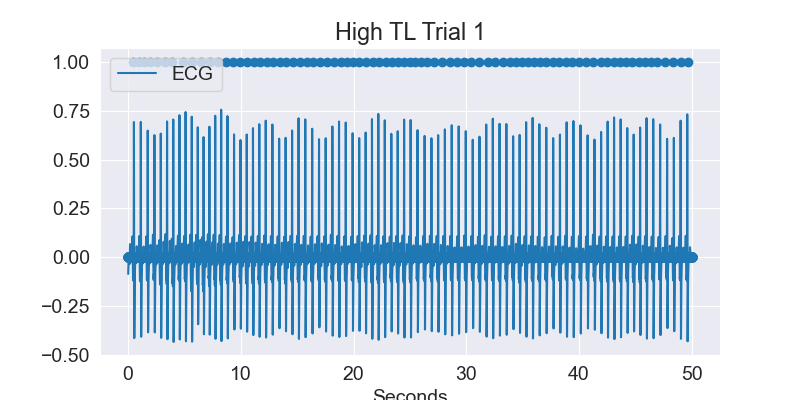

Text(0.5, 0, 'Seconds')

In [24]:
plt.figure()
plt.plot(x_axis,pi_high_tl[1]['ECG_Clean'],label='ECG')
plt.scatter(x_axis,rpeaks)
plt.legend()
plt.title("High TL Trial 1")
plt.xlabel("Seconds")

In [46]:
for i in range(1,5):

    title = "Individual Heart Beats High TL Instance "+ str(i)
    plt.title(title)
    peaks = np.where(pi_high_tl[i]["ECG_R_Peaks"] == 1)[0]
    heartbeats = nk.ecg_segment(pi_high_tl[i]["ECG_Clean"], peaks, 2000)
    heartbeats = nk.epochs_to_df(heartbeats)

    heartbeats_pivoted = heartbeats.pivot(index="Time", columns="Label", values="Signal")

    plt.plot(heartbeats_pivoted)

    cmap = iter(
        plt.cm.YlOrRd(np.linspace(0, 1, num=int(heartbeats["Label"].nunique())))  # pylint: disable=E1101
    )  # Aesthetics of heart beats

    lines = []
    for x, color in zip(heartbeats_pivoted, cmap):
        (line,) = plt.plot(heartbeats_pivoted[x], color=color)
        lines.append(line)

    plt.savefig('data/part206/figures/'+title+'.jpg')